<a href="https://colab.research.google.com/github/Deepakk200/colab_python/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
heart = pd.read_csv('/content/drive/MyDrive/datasets/Heart.csv')
heart['AHD'] = 1*(heart['AHD'] == "Yes")# Force the response into a binary indicator:

print(heart.shape)
heart_train, heart_val = train_test_split(heart, train_size = 0.75, random_state = 109)

print(heart_train.shape, heart_val.shape)

x_train = heart_train[['Age']]
y_train = heart_train['AHD']


(303, 15)
(227, 15) (76, 15)


In [6]:

knn20 = KNeighborsClassifier( n_neighbors = 20 )
knn20.fit(x_train , y_train)
yhat20_class = knn20.predict(x_train)
yhat20_prob = knn20.predict_proba(x_train)

# print out the first 10 predictions for the actual data
print(yhat20_class[1:10])
print(yhat20_prob[1:10])

[0 1 1 1 0 1 1 0 1]
[[0.75 0.25]
 [0.4  0.6 ]
 [0.25 0.75]
 [0.3  0.7 ]
 [0.65 0.35]
 [0.45 0.55]
 [0.35 0.65]
 [0.7  0.3 ]
 [0.35 0.65]]


In [7]:
logit1 = LogisticRegression(penalty=None, max_iter = 1000)

logit1.fit(x_train,y_train)


print("Logistic Regression Estimated Betas (B0,B1):",logit1.intercept_, logit1.coef_[0])
logit1.predict_proba(x_train)

Logistic Regression Estimated Betas (B0,B1): [-3.32616703] [0.05933142]


array([[0.68458335, 0.31541665],
       [0.70962816, 0.29037184],
       [0.48607262, 0.51392738],
       [0.44183498, 0.55816502],
       [0.42725744, 0.57274256],
       [0.5599436 , 0.4400564 ],
       [0.37042936, 0.62957064],
       [0.41280515, 0.58719485],
       [0.54527607, 0.45472393],
       [0.50090187, 0.49909813],
       [0.47126785, 0.52873215],
       [0.45651346, 0.54348654],
       [0.35670215, 0.64329785],
       [0.47126785, 0.52873215],
       [0.61733664, 0.38266336],
       [0.48607262, 0.51392738],
       [0.67163396, 0.32836604],
       [0.68458335, 0.31541665],
       [0.3843692 , 0.6156308 ],
       [0.34320632, 0.65679368],
       [0.45651346, 0.54348654],
       [0.58894264, 0.41105736],
       [0.45651346, 0.54348654],
       [0.69725226, 0.30274774],
       [0.44183498, 0.55816502],
       [0.73345861, 0.26654139],
       [0.5599436 , 0.4400564 ],
       [0.53052956, 0.46947044],
       [0.5599436 , 0.4400564 ],
       [0.32995921, 0.67004079],
       [0.

In [8]:
# Define the equivalent validation variables from `heart_val`
x_val = heart_val[['Age']]
y_val = heart_val['AHD']
knn20_train_accuracy = knn20.score(x_train, y_train)
knn20_val_accuracy  = knn20.score(x_val, y_val)
logit_train_accuracy = logit1.score(x_train, y_train)
logit_val_accuracy = logit1.score(x_val, y_val)
print("k-NN Train & Validation Accuracy:", knn20_train_accuracy, knn20_val_accuracy)
print("Logisitic Train & Validation Accuracy:", logit_train_accuracy, logit_val_accuracy)



k-NN Train & Validation Accuracy: 0.6563876651982379 0.5921052631578947
Logisitic Train & Validation Accuracy: 0.6387665198237885 0.6052631578947368


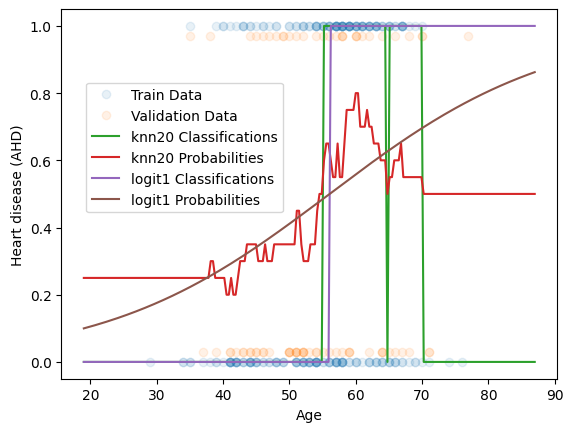

In [9]:
x = np.linspace(np.min(heart['Age'])-10, np.max(heart['Age'])+10, 200)
yhat_class_knn20 = knn20.predict(x[:, None])
yhat_prob_knn20 = knn20.predict_proba(x[:, None])[:, 1]
yhat_class_logit = logit1.predict(x[:, None])
yhat_prob_logit = logit1.predict_proba(x[:, None])[:, 1]

plt.plot(x_train, y_train, 'o' ,alpha=0.1, label='Train Data')
plt.plot(x_val, 0.94*y_val+0.03, 'o' ,alpha=0.1, label='Validation Data')
# plot the predictions
plt.plot(x, yhat_class_knn20, label='knn20 Classifications')
plt.plot(x, yhat_prob_knn20, label='knn20 Probabilities')
plt.plot(x, yhat_class_logit, label='logit1 Classifications')
plt.plot(x, yhat_prob_logit, label='logit1 Probabilities')
# put the lower-left part of the legend 5% to the right along the x-axis, and 45% up along the y-axis
plt.legend(loc=(0.05,0.45))

# Don't forget your axis labels!
plt.xlabel("Age")
plt.ylabel("Heart disease (AHD)")
plt.show()

In [12]:
predictors = ['Chol','MaxHR']

x_train = heart_train[predictors]
poly = PolynomialFeatures(degree=3,include_bias=False)
x_train_poly = poly.fit_transform(x_train)
y_train = heart_train['AHD']

lr = LogisticRegression(penalty=None, max_iter = 5000).fit(x_train_poly, y_train)
y_pred = lr.predict(x_train_poly)

print("Logistic Regression accuracy:", accuracy_score(y_train, y_pred))

Logistic Regression accuracy: 0.6828193832599119


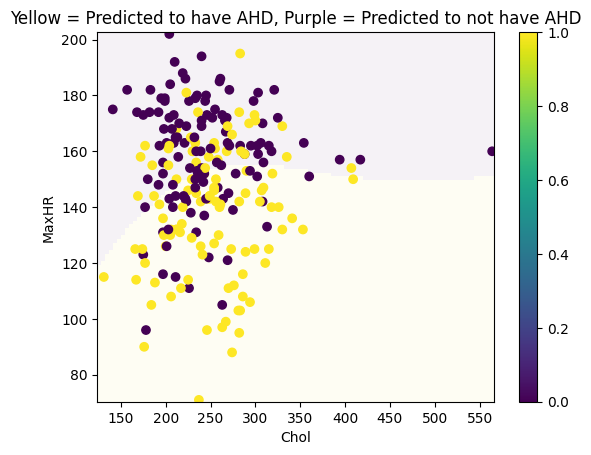

In [13]:
x1=np.linspace(heart[['Chol']].min(),heart[['Chol']].max(),100)
x2=np.linspace(heart[['MaxHR']].min(),heart[['MaxHR']].max(),100)
x1v, x2v = np.meshgrid(x1, x2)
X = np.c_[x1v.ravel(), x2v.ravel()]
X_dummy = poly.fit_transform(X)
yhat = lr.predict(X_dummy)

plt.pcolormesh(x1v, x2v, yhat.reshape(x1v.shape),alpha = 0.05)
plt.scatter(heart_train['Chol'],heart_train['MaxHR'],c=heart_train['AHD'])
plt.ylabel("MaxHR")
plt.xlabel("Chol")
plt.title("Yellow = Predicted to have AHD, Purple = Predicted to not have AHD")
plt.colorbar()
plt.show()

In [14]:
### edTest(test_modified_outputs) ###
# here we are going to create new dataframes based on x_train
# where we will modify each dataframe slightly
# by adding and subtracting by a standard deviation of a feature
# to see how the model outcomes change
def get_num_modified_outputs(predictor, x_change):
    #create a copy of the training data
    x_copy = x_train.copy()
    # modify the predictor by the value x_change
    x_copy[predictor] = x_copy[predictor] + x_change
    # apply the degree-3 polynomial transform to x_copy
    x_copy_poly = poly.fit_transform(x_copy)
    # create predictions for x_copy_poly using the logistic regression model (lr)
    y_pred_modified = lr.predict(x_copy_poly)
    # Assuming y_pred and y_pred_modified are numpy arrays
    n_changed_outputs = np.sum(y_pred != y_pred_modified)
    return n_changed_outputs
# get standard deviation of each variable
# so that we can modify each variable
# while respecting the size/spread of that predictor in the data
# (another valid way would be to scale our data at the beginning of this exercise)
stdev_MaxHR = heart_train['MaxHR'].std()
stdev_Chol = heart_train['Chol'].std()
# get the number of modified outputs
# when modifying each variable up and down
# by 0.5 of its standard deviation
n_modify_chol_up = get_num_modified_outputs('Chol', 0.5*stdev_Chol)
n_modify_chol_down = get_num_modified_outputs('Chol', -0.5*stdev_Chol)
n_modify_maxhr_up = get_num_modified_outputs('MaxHR', 0.5*stdev_MaxHR)
n_modify_maxhr_down = get_num_modified_outputs('MaxHR', -0.5*stdev_MaxHR)

print('# outputs changed by increasing Chol:', n_modify_chol_up)
print('# outputs changed by decreasing Chol:', n_modify_chol_down)
print('# outputs changed by increasing MaxHR:', n_modify_maxhr_up)
print('# outputs changed by decreasing MaxHR:', n_modify_maxhr_down)


# outputs changed by increasing Chol: 12
# outputs changed by decreasing Chol: 13
# outputs changed by increasing MaxHR: 42
# outputs changed by decreasing MaxHR: 50
